In [ ]:
%pip install sklearn

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier,OutputCodeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.utils import shuffle


In [3]:
all_scores = pd.read_csv("feature_out.csv")
all_scores.head()

,1.Lexical Features are ........TypeToken,Corrected_typeToken,Root_typeToken,Bilogarithmic_typeToken,Uber_Index,POS_numNouns,POS_numProperNouns,POS_numPronouns,POS_numConjunct,POS_numAdjectives,...,third person - 3,fourth person - 4,referent elevating - Elev,formal register - Form,speaker humbling - Humb,informal register - Infm,inclusive - In,exclusive- Ex,label,filename
0,0.433663,9.745372,13.782037,0.879225,44.277649,0.238614,0.033663,0.049505,0.036634,0.089109,...,110,0,0,0,0,0,0,0,C2,30.txt
1,0.254894,9.017274,12.752351,0.825321,30.514244,0.157811,0.000400,0.114662,0.039952,0.061526,...,213,0,0,0,0,0,0,0,C2,Jane_Eyre-Charlotte_Bronte17.txt
2,0.288288,8.855191,12.523132,0.835101,31.899778,0.185480,0.000000,0.082141,0.033386,0.053524,...,320,0,0,0,0,0,0,0,C2,Cry_Freedom-John_Briley8.txt
3,0.319310,8.597694,12.158976,0.843173,32.999268,0.176552,0.000000,0.092414,0.035172,0.053103,...,167,0,0,0,0,0,0,0,C2,The_Coral_Island-R_M_Ballantyne7.txt
4,0.281236,9.464340,13.384598,0.835792,32.863926,0.171302,0.000000,0.112141,0.029139,0.053422,...,267,0,0,0,0,0,0,0,C2,The_Best_of_times-Alan_Maley13.txt


In [9]:
try:
    all_scores = all_scores.drop(['filename'], axis=1)
except:
    print("No filename column present")

No filename column present


In [10]:
labels = all_scores[['label']]
main_scores = all_scores.drop(['label'], axis=1)
scores = shuffle(all_scores)
X = scores.iloc[:,0:-1]
y = scores.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(main_scores,labels, test_size=0.2, random_state=42, shuffle=True)

In [11]:
## Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X_scaled = sc_X.fit_transform(X)

In [12]:

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.values.ravel())
clf_predict = clf.predict(X_test)

confusion_matrix(y_test,clf_predict)
accuracy_score(y_test,clf_predict)

0.3333333333333333

In [13]:

clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf_fit = clf.fit(X_train,y_train)
predict = clf_fit.predict(X_test)

confusion_matrix(y_test,predict)
accuracy_score(y_test,predict)
#

0.6666666666666666

In [14]:
clf1 = OneVsOneClassifier(LinearSVC(C=100.))
clf1.fit(X_train,y_train)
clf1_predict = clf1.predict(X_test)

confusion_matrix(y_test,clf1_predict)
accuracy_score(y_test,clf1_predict)

/home/rajarshi07/Downloads/TP_Pruthvi/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6666666666666666

In [15]:

clf2 = OutputCodeClassifier(LinearSVC(C=100.), code_size=2, random_state=0)
clf2.fit(X_train,y_train)
clf2_predict = clf2.predict(X_test)


#cnf_matrix = confusion_matrix(y_test, predict)
#accuracy_score(y_test,predict)
##
##
##confusion_matrix(y_test,clf1_predict)
##accuracy_score(y_test,clf1_predict)
##
confusion_matrix(y_test,clf2_predict)
accuracy_score(y_test,clf2_predict)
##

/home/rajarshi07/Downloads/TP_Pruthvi/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6666666666666666

In [16]:

clf3 = BernoulliNB()
clf3.fit(X_train, y_train)
clf3_predict = clf3.predict(X_test)

confusion_matrix(y_test,clf3_predict)
accuracy_score(y_test,clf3_predict)
##

/home/rajarshi07/Downloads/TP_Pruthvi/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333

In [17]:

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train,y_train)
clf4_predict = forest.predict(X_test) 

confusion_matrix(y_test,clf4_predict)
accuracy_score(y_test,clf4_predict)
#

/tmp/ipykernel_4284/2748074478.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.3333333333333333

In [18]:

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
cross_scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='f1')
print(cross_scores.mean())


cross_scores = cross_val_score(forest, X_scaled, y, cv=10, scoring='accuracy')
print(cross_scores.mean())

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    croos_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(cross_scores.mean())
print(k_scores)


k_range = list(range(100, 301))
k_scores = []

for k in k_range:
    forest = RandomForestClassifier(n_estimators=k, random_state=1)
    croos_scores = cross_val_score(forest, X_scaled, y, cv=10, scoring='accuracy')
    k_scores.append(cross_scores.mean())
print(k_scores)



ValueError: n_splits=10 cannot be greater than the number of members in each class.

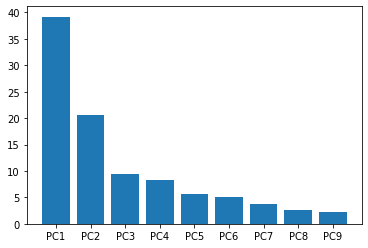

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [19]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(0.95)
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=2)
pca_labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]


plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=pca_labels)
plt.show()

pca_df = pd.DataFrame(pca_data,columns = pca_labels)
X_pca = pca_df.iloc[:,0:17]


forest = RandomForestClassifier(n_estimators=100, random_state=1)
croos_scores = cross_val_score(forest, X_pca, y, cv=10, scoring='accuracy')
croos_scores.mean()

knn = KNeighborsClassifier(n_neighbors=5)
croos_scores = cross_val_score(clf, X_pca, y, cv=10, scoring='accuracy')
croos_scores.mean()

croos_scores = cross_val_score(clf1, X_pca, y, cv=10, scoring='accuracy')
croos_scores.mean()

croos_scores = cross_val_score(clf2, X_pca, y, cv=10, scoring='accuracy')
croos_scores.mean()

croos_scores = cross_val_score(clf3, X_pca, y, cv=10, scoring='accuracy')
croos_scores.mean()



In [20]:


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC

#iris = load_iris()

model_to_set = OneVsOneClassifier(SVC(kernel="poly"))

parameters = {
    "estimator__C": [100,200,400,800],
    "estimator__kernel": ["poly","rbf"],
    "estimator__degree":[1, 2, 3, 4],
}
score_func = make_scorer(f1_score,average="micro")
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=score_func)

model_tunning.fit(X_pca,y)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy']
}
rfc=RandomForestClassifier(random_state=42)

model_tunning = GridSearchCV(rfc, param_grid=parameters,cv= 5)


0.6
{'estimator__C': 100, 'estimator__degree': 2, 'estimator__kernel': 'poly'}
